### Load tensorflow

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Nadam, SGD, Adam

Using TensorFlow backend.


In [2]:
#Reset Default graph - Needed only for Jupyter notebook
tf.reset_default_graph()

### Collect Data

In [3]:
import pandas as pd

In [4]:
df_prices = pd.read_csv('./prices.csv')

### Check all columns in the dataset

In [5]:
df_prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
df_prices.describe(include='all')

,date,symbol,open,close,low,high,volume
count,851264,851264,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
unique,3524,501,NaN,NaN,NaN,NaN,NaN
top,2016-07-28,MRO,NaN,NaN,NaN,NaN,NaN
freq,498,1762,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,NaN,NaN,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,NaN,NaN,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,NaN,NaN,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,NaN,NaN,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,NaN,NaN,79.879997,79.889999,79.110001,80.610001,5.222500e+06


### Drop columns `date` and  `symbol`

In [7]:
df_prices.drop(['date', 'symbol'], axis=1, inplace=True, errors='ignore')

In [8]:
df_prices.head()

,open,close,low,high,volume
0,123.430000,125.839996,122.309998,126.250000,2163600.0
1,125.239998,119.980003,119.940002,125.540001,2386400.0
2,116.379997,114.949997,114.930000,119.739998,2489500.0
3,115.480003,116.620003,113.500000,117.440002,2006300.0
4,117.010002,114.970001,114.089996,117.330002,1408600.0


### Consider only first 1000 rows in the dataset for building feature set and target set

In [9]:
df_prices_mini = df_prices[0:1000]
df_prices_mini.shape

(1000, 5)

### Divide the data into train and test sets

In [10]:
X = df_prices_mini.drop('close', axis=1)
X = X.apply(zscore)
y = df_prices_mini['close']
y = zscore(y)
y = [[v] for v in y]

X.shape, len(y)

((1000, 4), 1000)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((700, 4), (300, 4), 700, 300)

In [13]:
n_samples, n_features = X_train.shape[0], X_train.shape[1]
n_samples, n_features

(700, 4)

## Building the graph in tensorflow

In [14]:
rs = np.random.RandomState(seed=123)

In [15]:
X_placeholder = tf.placeholder(tf.float32, shape=[None, n_features])
y_placeholder = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal(shape=[n_features, 1]))
b = tf.Variable(rs.rand())

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
print("X_placeholder = " , X_placeholder)
print("y_placeholder = ", y_placeholder)
print("W = ", W)
print("b = ", b)

X_placeholder =  Tensor("Placeholder:0", shape=(?, 4), dtype=float32)
y_placeholder =  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
W =  <tf.Variable 'Variable:0' shape=(4, 1) dtype=float32_ref>
b =  <tf.Variable 'Variable_1:0' shape=() dtype=float32_ref>


1.Define input data placeholders

2.Define Weights and Bias

3.Prediction

In [17]:
y_hat = tf.add(tf.matmul(X_placeholder, W),  b)

4.Loss (Cost) Function [Mean square error]

In [18]:
# Mean squared error 
cost = tf.reduce_mean(tf.square(tf.subtract(y_placeholder, y_hat)))

5.GradientDescent Optimizer to minimize Loss [GradientDescentOptimizer]

In [19]:
learning_rate = 0.05

In [20]:
# Gradient descent 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) # opearational tensor

# Initializing the variables 
init = tf.global_variables_initializer() 

## Execute the Graph for 100 epochs and observe the loss

In [21]:
training_epochs = 100
display_step = 20

Epoch:20 	 Cost:0.05083097890019417 	 W:['[-0.9132568]', '[1.0919683]', '[0.7620585]', '[-0.20498997]'] 	 b:0.08194610476493835
Epoch:40 	 Cost:0.0007842706982046366 	 W:['[-0.8958571]', '[1.1092755]', '[0.779468]', '[-0.02407327]'] 	 b:0.009406397119164467
Epoch:60 	 Cost:9.757715451996773e-05 	 W:['[-0.89366984]', '[1.1113361]', '[0.7816444]', '[-0.00284594]'] 	 b:0.0010751377558335662
Epoch:80 	 Cost:8.814118336886168e-05 	 W:['[-0.8933699]', '[1.1115057]', '[0.7819311]', '[-0.00035117]'] 	 b:0.00011997971159871668
Epoch:100 	 Cost:8.800152863841504e-05 	 W:['[-0.89329195]', '[1.1114526]', '[0.7819951]', '[-5.790812e-05]'] 	 b:1.0635621947585605e-05
Optimization Finished!
Final training cost: 8.800153e-05 W: [[-8.9329195e-01]
 [ 1.1114526e+00]
 [ 7.8199512e-01]
 [-5.7908121e-05]] b: 1.0635622e-05 



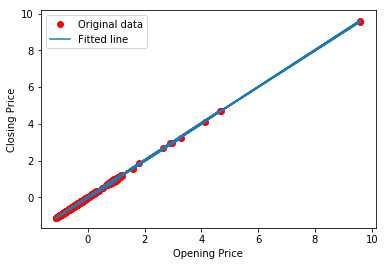

Final testing cost: 0.00011511242
Absolute mean square loss difference: 2.7110895e-05


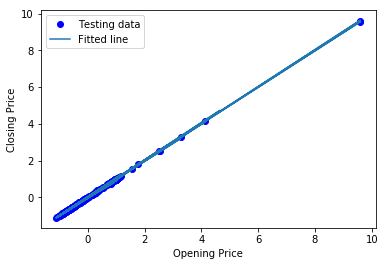

In [22]:
with tf.Session() as sess: 
    # Load initialized variables in current session 
    sess.run(init) 

    # Fit all training data 
    for epoch in range(training_epochs): 

        # perform gradient descent step 
        sess.run(optimizer, feed_dict={X_placeholder: X_train, y_placeholder: y_train}) 
        
        # Display logs per epoch step 
        if (epoch + 1) % display_step == 0: 
            c = sess.run(cost, feed_dict={X_placeholder: X_train, y_placeholder: y_train}) 
            print("Epoch:{} \t Cost:{} \t W:{} \t b:{}".format(epoch+1, c, [str(w) for w in sess.run(W)], sess.run(b))) 

    # Print final parameter values 
    print("Optimization Finished!") 
    training_cost = sess.run(cost, feed_dict={X_placeholder: X_train, y_placeholder: y_train}) 
    print("Final training cost:", training_cost, "W:", sess.run(W), "b:", sess.run(b), '\n') 
       
    # Graphic display 
    y_train_pred = sess.run(y_hat, feed_dict={X_placeholder: X_train})
    plt.plot(X_train['open'], y_train, 'ro', label='Original data') 
    plt.plot(X_train['open'], y_train_pred, label='Fitted line') 
    plt.xlabel("Opening Price")
    plt.ylabel("Closing Price")
    plt.legend() 
    plt.show() 

    # Testing the model 
    testing_cost = sess.run(cost, feed_dict={X_placeholder: X_test, y_placeholder: y_test}) 
    
    print("Final testing cost:", testing_cost) 
    print("Absolute mean square loss difference:", abs(training_cost - testing_cost)) 

    # Display fitted line on test data 
    y_test_pred = sess.run(y_hat, feed_dict={X_placeholder: X_test})
    plt.plot(X_test['open'], y_test, 'bo', label='Testing data') 
    plt.plot(X_train['open'], y_train_pred, label='Fitted line') 
    plt.xlabel("Opening Price")
    plt.ylabel("Closing Price")
    plt.legend() 
    plt.show()

### Get the shapes and values of W and b

Hint: Use sess.run(W) to get W.

In [23]:
# Beejal - Done above

### Find the Absolute mean square loss difference between training and testing loss.

In [24]:
# Beejal - Done above

### Linear Classification using Keras

### Building the simple Neural Network in Keras with one neuron in the dense hidden layer.
#### Use Mean square error as loss function and sgd as optimizer

In [25]:
model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 1, activation ='sigmoid', input_shape =( n_features,)))
model.add( Dense( units = 1, activation ='linear')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='mse', optimizer = SGD(), metrics =['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 5         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


### Execute the model

In [26]:
batch_size=50
n_epochs = 20

In [27]:
X = df_prices_mini.drop('close', axis=1)
y = df_prices_mini['close']
X = X.apply(zscore)
y = zscore(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
model.fit( X_train, y_train, batch_size = batch_size, epochs = n_epochs) 

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
700/700 [==============================] - 0s 331us/step - loss: 0.8969 - mean_absolute_error: 0.7120
Epoch 2/20
700/700 [==============================] - 0s 40us/step - loss: 0.8919 - mean_absolute_error: 0.7055
Epoch 3/20
700/700 [==============================] - 0s 38us/step - loss: 0.8886 - mean_absolute_error: 0.7018
Epoch 4/20
700/700 [==============================] - 0s 36us/step - loss: 0.8851 - mean_absolute_error: 0.6973
Epoch 5/20
700/700 [==============================] - 0s 34us/step - loss: 0.8821 - mean_absolute_error: 0.6933
Epoch 6/20
700/700 [==============================] - 0s 38us/step - loss: 0.8783 - mean_absolute_error: 0.6914
Epoch 7/20
700/700 [==============================] - 0s 31us/step - loss: 0.8749 - mean_absolute_error: 0.6892
Epoch 8/20
700/700 [==============================] - 0s 41us/step - loss: 0.8708 - mean_absolute_error: 0.6858
Epoch 9/20
700/700 [==============================] - 0

In [29]:
scores = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 224us/step


In [30]:
print('loss:', scores[0]) 
print('mae:', scores[1])

loss: 1.1009619104862214
mae: 0.6653611946105957


### Classification using Keras 

### Load the given Iris data using pandas (Iris.csv)

In [31]:
df = pd.read_csv('Iris.csv')

In [32]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Splitting the data into feature set and target set

In [33]:
df.drop('Id', axis=1, inplace=True, errors='ignore')

In [34]:
X = df.drop('Species', axis=1)
y = df['Species']

In [35]:
X.shape, len(y)

((150, 4), 150)

### Target set has different categories. So, Label encode them. And convert into one-hot vectors using get_dummies in pandas.

In [36]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
y_en = pd.get_dummies(y)

In [38]:
y_en.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


### Divide the dataset into Training and test (70:30)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.33, random_state=42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 4), (50, 4), (100, 3), (50, 3))

### Model
Build the model with following layers: <br>
1. First dense layer with 10 neurons with input shape 4 (according to the feature set) <br>
2. Second Dense layer with 8 neurons <br>
3. Output layer with 3 neurons with softmax activation (output layer, 3 neurons as we have 3 classes) <br>
4. Use SGD and categorical_crossentropy loss 

In [41]:
# define some hyper parameters 
n_inputs = 4
n_classes = len(y.unique())
batch_size = 100 
n_epochs = 150

# [Beejal] To achieve more accuracy, I have used 'relu' as activation function (Non Linear function) 
# & Optimizer as 'Nadam'.
# Combination of 'sigmoid' as activation function (Non Linear function) & SGD (Linear function)
# was giving just 30% accuracy
model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 10, activation ='relu', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 8, activation ='relu')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = Nadam(), metrics =['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                50        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


### Fitting the model and predicting 

In [42]:
# train the model 
model.fit( X_train, y_train, batch_size = batch_size, epochs = n_epochs) 

Epoch 1/150
100/100 [==============================] - 1s 6ms/step - loss: 5.3817 - acc: 0.3500
Epoch 2/150
100/100 [==============================] - 0s 61us/step - loss: 5.3198 - acc: 0.3500
Epoch 3/150
100/100 [==============================] - 0s 10us/step - loss: 4.8868 - acc: 0.3500
Epoch 4/150
100/100 [==============================] - 0s 32us/step - loss: 5.0827 - acc: 0.3500
Epoch 5/150
100/100 [==============================] - 0s 52us/step - loss: 4.6884 - acc: 0.3500
Epoch 6/150
100/100 [==============================] - 0s 37us/step - loss: 4.5133 - acc: 0.3500
Epoch 7/150
100/100 [==============================] - 0s 34us/step - loss: 4.2811 - acc: 0.3500
Epoch 8/150
100/100 [==============================] - 0s 36us/step - loss: 4.6672 - acc: 0.3500
Epoch 9/150
100/100 [==============================] - 0s 46us/step - loss: 4.4417 - acc: 0.3500
Epoch 10/150
100/100 [==============================] - 0s 28us/step - loss: 4.1679 - acc: 0.3500
Epoch 11/150
100/100 [========

Epoch 85/150
100/100 [==============================] - 0s 48us/step - loss: 0.9050 - acc: 0.6900
Epoch 86/150
100/100 [==============================] - 0s 27us/step - loss: 0.9223 - acc: 0.6300
Epoch 87/150
100/100 [==============================] - 0s 45us/step - loss: 0.8532 - acc: 0.6600
Epoch 88/150
100/100 [==============================] - 0s 60us/step - loss: 0.8580 - acc: 0.6400
Epoch 89/150
100/100 [==============================] - 0s 10us/step - loss: 0.9450 - acc: 0.6200
Epoch 90/150
100/100 [==============================] - 0s 41us/step - loss: 0.8782 - acc: 0.6500
Epoch 91/150
100/100 [==============================] - 0s 54us/step - loss: 0.8663 - acc: 0.6100
Epoch 92/150
100/100 [==============================] - 0s 48us/step - loss: 0.8165 - acc: 0.7000
Epoch 93/150
100/100 [==============================] - 0s 64us/step - loss: 0.8262 - acc: 0.6600
Epoch 94/150
100/100 [==============================] - 0s 23us/step - loss: 0.7474 - acc: 0.7000
Epoch 95/150
100/100

In [43]:
y_pred = model.predict(X_test)

In [44]:
# evaluate the model and print the accuracy score 
scores = model.evaluate(X_test, y_test)

50/50 [==============================] - 0s 2ms/step


### Report Accuracy of the predicted values

In [45]:
print('loss:', scores[0]) 
print('accuracy:', scores[1])

loss: 0.5342120730876923
accuracy: 0.8599999904632568
